In [ ]:
import sys
import joblib
print("Python version:", sys.version)
print("Joblib version:", joblib.__version__)

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Joblib version: 1.4.2


## Importing Libraries

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

## data cleaning

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Data Science Roadmap Project 1 (Price Prediction with Deployment))/Bengaluru_House_Data.csv")

In [ ]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data=data.drop(['area_type','balcony','society','availability'],axis="columns")
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
data=data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
data['bhk']=data['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-145-01ca4a8adf34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bhk']=data['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
data["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
data[data["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
data[-data["total_sqft"].apply(lambda x: is_float(x))]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [ ]:
def range_to_average(x):
 token=x.split("-")
 if len(token)==2:
  return (float(token[0])+float(token[1]))/2
 try:
  return float(x)
 except:
  return None

In [ ]:
data["total_sqft"]=data["total_sqft"].apply(lambda x: range_to_average(x))

In [ ]:
data["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

## Feature Engineering

In [ ]:
data["price_per_sqft"]=data["price"]*100000/data["total_sqft"]
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(data["location"].unique())

1304

In [ ]:
location_stats=data["location"].value_counts()

In [ ]:
print(type(location_stats))

<class 'pandas.core.series.Series'>


In [ ]:
len(location_stats[location_stats<=10])

1063

In [ ]:
location_less_than_ten=location_stats[location_stats<=10]
location_less_than_ten

location
Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: count, Length: 1063, dtype: int64

In [ ]:
data["location"]=data["location"].apply(lambda x: "other" if x in location_less_than_ten else x)

In [ ]:
len(data["location"].unique())

242

In [ ]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Outliers Removal

In [ ]:
data[data.total_sqft/data.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
data=data[(data.total_sqft/data.bhk)>300]

In [ ]:
data[data.total_sqft/data.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [ ]:
data["price_per_sqft"].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):

  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=subdf["price_per_sqft"].mean()
    std=np.std(subdf["price_per_sqft"])
    reduced_df=subdf[(subdf["price_per_sqft"]>(m-std)) & (subdf["price_per_sqft"]<=(m+std))]
    df_out=pd.concat([df_out,reduced_df], ignore_index=True)
  return df_out

In [ ]:
data=remove_pps_outliers(data)

In [ ]:
data["price_per_sqft"].describe()

count    10016.000000
mean      5623.633704
std       2207.930877
min       1250.000000
25%       4245.186754
50%       5164.868323
75%       6388.415673
max      24509.803922
Name: price_per_sqft, dtype: float64

In [ ]:
data["bhk"].value_counts()

bhk
2     4679
3     3938
4      690
1      511
5      101
6       52
7       19
8       13
9        7
10       2
11       2
16       1
13       1
Name: count, dtype: int64

In [ ]:
def plot_scatter_chart(data,location):
  bhk_2=data[(data.location==location) & (data.bhk==2)]
  bhk_3=data[(data["location"]==location) & (data['bhk']==3)]
  plt.scatter(bhk_2["price_per_sqft"],bhk_2["price"],marker="+",color="red")
  plt.scatter(bhk_3["price_per_sqft"],bhk_3["price"],marker="+",color="blue")
  plt.xlabel("price_per_sqft")
  plt.ylabel("price")
  plt.show()

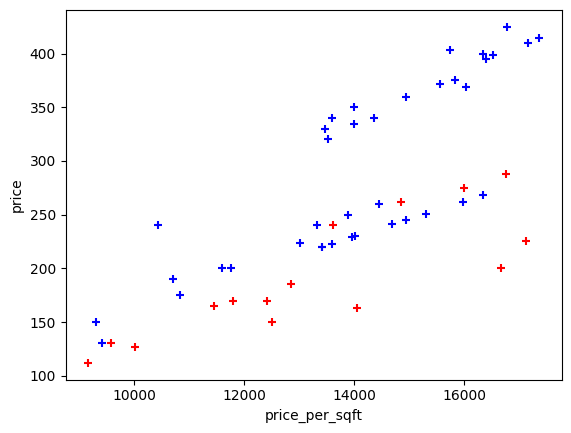

In [ ]:
plot_scatter_chart(data,"Rajaji Nagar")

In [ ]:
def bhk_outliers(data):
  df_out=pd.DataFrame()

  for key,subdf in data.groupby('location'):
    mean={}

    for bhk,bhkdf in subdf.groupby('bhk'):
      mean[bhk]=bhkdf["price_per_sqft"].mean()

    for bhk,bhkdf in subdf.groupby('bhk'):
      if mean.get(bhk-1) is None:
        df_out=pd.concat([df_out,bhkdf],ignore_index=True)
      else:
        removed=bhkdf[bhkdf['price_per_sqft']>=mean.get(bhk-1)]
        df_out=pd.concat([df_out,removed],ignore_index=True)

  return df_out

In [ ]:
data_new=bhk_outliers(data)

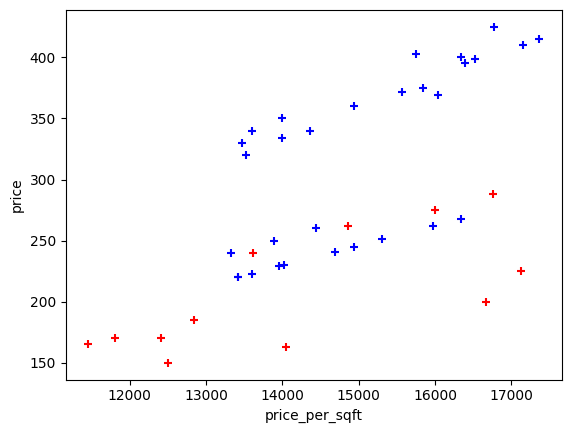

In [ ]:
plot_scatter_chart(data_new,"Rajaji Nagar")

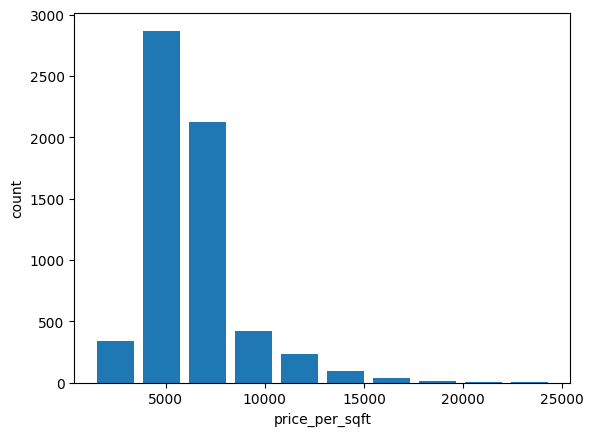

In [ ]:
plt.hist(data_new["price_per_sqft"],rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.show()

In [ ]:
data_new["bath"].unique()

array([ 2.,  3.,  4.,  8.,  1.,  5.,  6.,  7.,  9., 12., 13., 16.])

In [ ]:
data_new[data_new["bath"]>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3393,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
6129,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
6130,other,16 BHK,10000.0,16.0,550.0,16,5500.000000


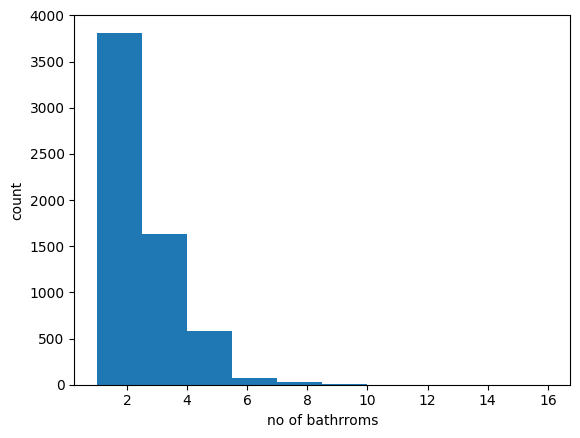

In [ ]:
plt.hist(data_new["bath"])
plt.xlabel("no of bathrroms")
plt.ylabel("count")
plt.show()

In [ ]:
data_new[data_new["bath"]>data_new["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3367,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
4260,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
6109,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
data_new=data_new[data_new["bath"]<data_new["bhk"]+2]

In [ ]:
data_new=data_new.drop(["price_per_sqft","size"],axis="columns")

In [ ]:
data_new.head()

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,40.0,2
1,Devarachikkanahalli,1200.0,2.0,83.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2
3,Devarachikkanahalli,947.0,2.0,43.0,2
4,Devarachikkanahalli,1130.0,2.0,36.0,2


In [ ]:
data_encoded=pd.get_dummies(data_new,columns=["location"])

In [ ]:
data_encoded

,total_sqft,bath,price,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1130.0,2.0,36.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,3300.0,8.0,310.0,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6127,4500.0,9.0,500.0,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6128,5000.0,9.0,360.0,11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6129,5425.0,13.0,275.0,13,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
data_encoded.shape

(6058, 246)

In [ ]:
X=data_encoded.drop("price",axis="columns")

In [ ]:
Y=data_encoded["price"]

In [ ]:
print(X.head())
print(Y.head())

   total_sqft  bath  bhk  location_ Devarachikkanahalli  \
0      1250.0   2.0    2                           True   
1      1200.0   2.0    2                           True   
2      1170.0   2.0    2                           True   
3       947.0   2.0    2                           True   
4      1130.0   2.0    2                           True   

   location_1st Block Jayanagar  location_1st Phase JP Nagar  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   

   location_2nd Phase Judicial Layout  location_2nd Stage Nagarbhavi  \
0                               False                          False   
1                               False                          False   
2                               False       

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
linear_regression.score(X_test,y_test)

0.8943256317781496

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.86353907, 0.86850159, 0.83883831, 0.81335916, 0.86602172])

In [ ]:
import joblib
joblib.dump(linear_regression,"/content/drive/MyDrive/Colab Notebooks/Data Science/Data Science Roadmap Project 1 (Price Prediction with Deployment))/linear_regression.pkl")

['/content/drive/MyDrive/Colab Notebooks/Data Science/Data Science Roadmap Project 1 (Price Prediction with Deployment))/linear_regression.pkl']

In [ ]:
import json
columns={"data_columns":[col.lower() for col in X.columns]}

with open("/content/drive/MyDrive/Colab Notebooks/Data Science/Data Science Roadmap Project 1 (Price Prediction with Deployment))/columns.json","w") as f:
  f.write(json.dumps(columns))

In [ ]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]=1
  return linear_regression.predict([x])[0]
